In [51]:
"""Ceci est un fichier de test contenant toutes les fonctions que je trouve pour débuter"""
#Importer les commandes utiles

import os
import os.path

from os import chdir

import sys, h5py, binascii
import numpy as np
import matplotlib.pyplot as plt
from pylab import * #Bibliothèque de fonctions qui ressemblent à matlab pour le calcul matriciel

from scipy.interpolate import griddata
from scipy.signal import medfilt2d, order_filter

#Définir les chemins qui nous interessent

path_SV="/home/chouze/Kriterres/Codes-Simon-Vedrine-2016"

path_CH="/home/chouze/Kriterres/TESTS_CLEM"

path_O="~/Codes/Porchet-new/TCHERNO/FORWARD_CLEM/SWMS_2D.OUT"

path_I="home/chouze/Codes/Porchet-new/TCHERNO/FORWARD_CLEM/SWMS_2D.IN/"

#Importer les fonctions créees par Simon Vedrine

chdir(path_SV)

from utils import *
from processing_tools import *

#Ouvrir un fichier de données de type ascii

chdir(path_CH)

data=open("example_radargram.dat")
contenu=data.read()
dx,dt = (0.00667, 0.008031) #Definition des pas de temps et pas d'espace
title="plot"

#Autre moyen pour ouvrir un fichier de type matrice
M=np.loadtxt('example_radargram.dat')
type(M) #Donne le type de variable
M=M.T #On prend la transposée de M colonnes=traces/lignes=data


In [57]:
print(path_O) #Commande qui permet d'afficher une sortie, par exemple un résultat

a,b=8,3.5 #On peut affecter paralèllement plusieurs variables sur une seule ligne, séparé par des virgules
print(a)
type(b)#Dès qu'il trouve une virgule il considère le nombre comme un float

~/Codes/Porchet-new/TCHERNO/FORWARD_CLEM/SWMS_2D.OUT
8


float

In [112]:
M[2,2] #Ceci correspond à la valeur contenue en 2,2 dans M
l,c=shape(M) #Donne la taille de la matrice M
print(l)
print(c)
print(M[2,2])

3113
37
-0.00078124803258


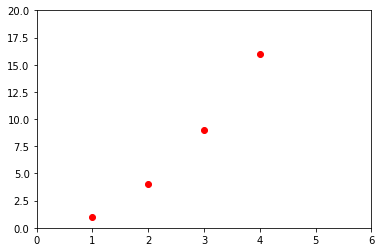

In [48]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro') #Exemple pour afficher un graphe de points rouges
plt.axis([0, 6, 0, 20]) #Donner les bornes du graphe
plt.show() #Demande d'afficher le graphique

In [30]:
M

array([[  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
         -5.35320473e+00,  -4.91742659e+00,  -4.48644495e+00],
       [  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
         -4.11582321e-01,  -1.58844680e-01,   8.07534829e-02],
       [  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
          1.74482632e+00,   1.80088699e+00,   1.84540737e+00],
       ..., 
       [  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
          1.49095941e+00,   1.48235476e+00,   1.46571434e+00],
       [  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
          3.54501218e-01,   2.42831126e-01,   1.33029491e-01],
       [  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
         -4.37180424e-04,  -5.52502577e-04,  -6.70919369e-04]])

In [103]:
T=[] #Une boucle pour créer un vecteur T contenant les temps
for i in range(0,l,1):#Attention de vérifier si l'on commencer à 0 ou à dt pour la première valeur
        T.append(i*dt)

In [95]:
type(dt)

float

In [76]:
read_ascii('example_radargram.dat')

ValueError: invalid literal for int() with base 10: '0.0000000000e+00'

In [79]:
T=np.zeros(l) #On crée une matrice de zéros de la taille de M

In [105]:
print(max(T)) #On peut afficher le max/min de T

24.992472


In [100]:
chdir(path_O)
read_ascii('')


FileNotFoundError: [Errno 2] No such file or directory: '~/Codes/Porchet-new/TCHERNO/FORWARD_CLEM/SWMS_2D.OUT'

In [110]:
type(M[2,2])

numpy.float64

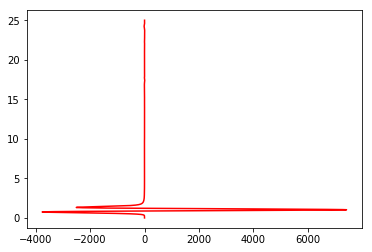

In [115]:
plt.plot(M[:,5],T, 'r') #On trace une trace au pif pour voir si ça marche
plt.show()

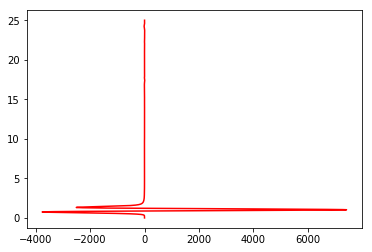

In [117]:
#On cherche à plotter le radargramme

#On commence par retirer la première trace pour y voir plus clair
for n in range(1,c-1):
    M[:,n]=M[:,n]-M[:,1]
    
plt.plot(M[:,5],T, 'r') #On trace une trace au pif pour voir si ça marche
plt.show()